In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

# Load the data

In [5]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


 # Visualizing the dataset

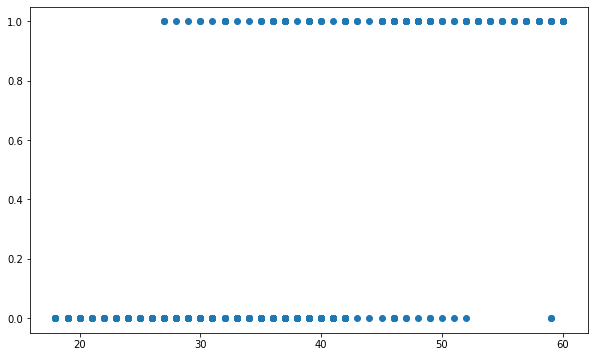

In [9]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()
# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)


# Creating the logistic regression model

In [10]:
def normalize(X):
    return X - X.mean()


def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

def logistic_regression(X, Y):

    X = normalize(X)

   
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

 # Training the model

In [11]:
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions

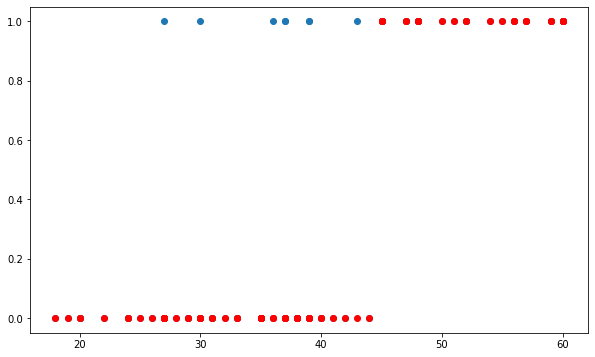

In [12]:
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
# plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()

In [13]:
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

Accuracy = 0.9
